In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sys

PATH = 'C:/Users/Emily/Dropbox (MIT)/Classes/Spring 2020/6.864/proj'
sys.path.insert(1, 'C:/Users/Emily/Dropbox (MIT)/Classes/Spring 2020/6.864/proj')

# Sentence Analysis

In [2]:
sentences = [
  # From July 8, 2017 New York Times:
  'Scientists at the CERN laboratory say they have discovered a new particle.',
  'There’s a way to measure the acute emotional intelligence that has never gone out of style.',
  'President Trump met with other leaders at the Group of 20 conference.',
  'The Senate\'s bill to repeal and replace the Affordable Care Act is now imperiled.',
  # From Google's Tacotron example page:
  'Generative adversarial network or variational auto-encoder.',
  'The buses aren\'t the problem, they actually provide a solution.',
  'Does the quick brown fox jump over the lazy dog?',
  'Talib Kweli confirmed to AllHipHop that he will be releasing an album in the next year.',
  # More, based on https://www.researchgate.net/figure/Distribution-of-English-sentences-according-to-their-lengths-in-words_fig4_221628889
  'You\'re still not completely convinced that that\'s going to happen, are you?',
  'Tom thinks that it\'s time for Mary to ask for help.',
  'I think that he is the only vegetarian here.',
  'Sami was a zombie, and he didn\'t know what was going on.',
  'I thought you said I have to do that.',
  'In silence, she placed her left hand in my right hand.',
  'Both my parents are musicians.',
  'Did you guys talk about me while I was gone?',
  'Just tell me what happens.',
  'I can\'t sit around waiting any longer.',
  'Are you still interested in the job?',
  'Jesus wept.'
]

In [3]:
sentence_lengths = [
    len(sentence.split()) for sentence in sentences
]
sentence_lengths

[12, 16, 12, 14, 6, 10, 10, 16, 12, 11, 9, 12, 9, 11, 5, 10, 5, 7, 7, 2]

In [161]:
print(np.mean(sentence_lengths))
print(np.std(sentence_lengths))

9.8
3.5721142198983507


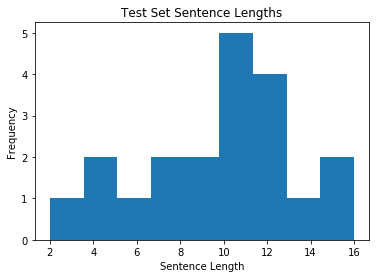

In [12]:
plt.hist(sentence_lengths, 9)
plt.ylabel('Frequency')
plt.xlabel('Sentence Length')
plt.title('Test Set Sentence Lengths')
plt.savefig('{}/test_sentence_lengths.png'.format(PATH))

## German set

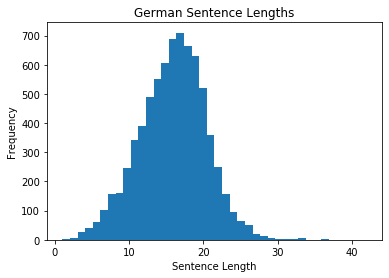

In [162]:
germ_file = open(PATH + '/german_transcript.txt', 'r', encoding="utf8")
sent_lengths = []
for line in germ_file:
    sentence = (line.split('|')[-2]).split()
    sent_lengths.append(len(sentence))
    
plt.hist(sent_lengths, 40)
plt.ylabel('Frequency')
plt.xlabel('Sentence Length')
plt.title('German Sentence Lengths')
# plt.show()
plt.savefig('{}/plots/germ_sentence_lengths.png'.format(PATH))

In [163]:
print(np.mean(sent_lengths))
print(np.std(sent_lengths))

16.032987747408107
4.39498162355347


## English set

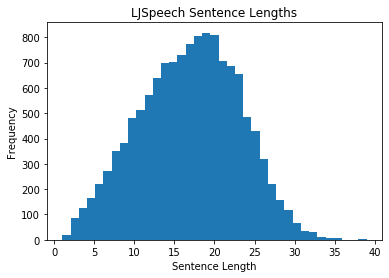

In [164]:
eng_file = open(PATH + '/tacotron/training/train.txt', 'r', encoding="utf8")
sent_lengths = []
for line in eng_file:
    sentence = (line.split('|')[-1]).split()
    sent_lengths.append(len(sentence))
    
plt.hist(sent_lengths, 37)
plt.ylabel('Frequency')
plt.xlabel('Sentence Length')
plt.title('LJSpeech Sentence Lengths')
plt.savefig('{}/plots/lj_sentence_lengths.png'.format(PATH))

In [165]:
print(np.mean(sent_lengths))
print(np.std(sent_lengths))

16.986564885496183
6.063252065069412


# MOS Scores

In [36]:
responses = pd.read_csv(PATH + '/responses.csv')
responses.drop(columns=['Timestamp'], inplace=True)
responses = responses[responses['Are you a native English speaker?'] != 'No']
responses.drop(columns=['Are you a native English speaker?', "Which set of audio clips will you listen to?"], inplace=True)
responses.head()

,E1 [Pronunciation],E1 [Naturalness],E2 [Pronunciation],E2 [Naturalness],F3 [Pronunciation],F3 [Naturalness],F4 [Pronunciation],F4 [Naturalness],L5 [Pronunciation],L5 [Naturalness],...,F2 [Pronunciation],F2 [Naturalness],L3 [Pronunciation],L3 [Naturalness],L4 [Pronunciation],L4 [Naturalness],M5 [Pronunciation],M5 [Naturalness],M6 [Pronunciation],M6 [Naturalness]
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
pro_df = responses.filter(regex='Pronunciation')
pro_df.head()

,E1 [Pronunciation],E2 [Pronunciation],F3 [Pronunciation],F4 [Pronunciation],L5 [Pronunciation],L6 [Pronunciation],M7 [Pronunciation],M8 [Pronunciation],E3 [Pronunciation],E4 [Pronunciation],...,M3 [Pronunciation],M4 [Pronunciation],E19 [Pronunciation],E20 [Pronunciation],F1 [Pronunciation],F2 [Pronunciation],L3 [Pronunciation],L4 [Pronunciation],M5 [Pronunciation],M6 [Pronunciation]
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
nat_df = responses.filter(regex='Naturalness')
nat_df.head()

,E1 [Naturalness],E2 [Naturalness],F3 [Naturalness],F4 [Naturalness],L5 [Naturalness],L6 [Naturalness],M7 [Naturalness],M8 [Naturalness],E3 [Naturalness],E4 [Naturalness],...,M3 [Naturalness],M4 [Naturalness],E19 [Naturalness],E20 [Naturalness],F1 [Naturalness],F2 [Naturalness],L3 [Naturalness],L4 [Naturalness],M5 [Naturalness],M6 [Naturalness]
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
def process(df, model='E'):
    """
    Returns processesd
    """
    filtered = df.filter(regex=model)
    fdict = filtered.to_dict('list')

    # strip nan
    for file in filtered:
        fdict[file] = [x for x in fdict[file] if not math.isnan(x)][:10]
    
    return pd.DataFrame(fdict)

## Pure English

In [52]:
import math

In [87]:
e_prodf = process(pro_df)
e_prodf.head(10)

,E1 [Pronunciation],E2 [Pronunciation],E3 [Pronunciation],E4 [Pronunciation],E5 [Pronunciation],E6 [Pronunciation],E7 [Pronunciation],E8 [Pronunciation],E9 [Pronunciation],E10 [Pronunciation],E11 [Pronunciation],E12 [Pronunciation],E13 [Pronunciation],E14 [Pronunciation],E15 [Pronunciation],E16 [Pronunciation],E17 [Pronunciation],E18 [Pronunciation],E19 [Pronunciation],E20 [Pronunciation]
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
4,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
def print_stuff(df):
    print('Mean MOS: ', df.values.mean())
    print('STD MOS: ', df.values.std())
    
print_stuff(e_prodf)

Mean MOS:  1.06
STD MOS:  0.32619012860600183


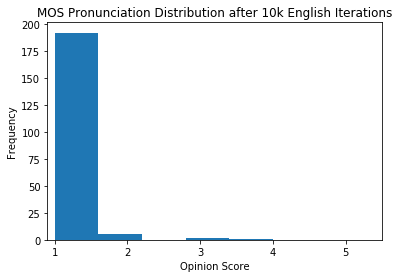

In [98]:
plt.hist(e_prodf.values.flatten(), 5)
plt.title('MOS Pronunciation Distribution after 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosE.png')

,E1 [Naturalness],E2 [Naturalness],E3 [Naturalness],E4 [Naturalness],E5 [Naturalness],E6 [Naturalness],E7 [Naturalness],E8 [Naturalness],E9 [Naturalness],E10 [Naturalness],E11 [Naturalness],E12 [Naturalness],E13 [Naturalness],E14 [Naturalness],E15 [Naturalness],E16 [Naturalness],E17 [Naturalness],E18 [Naturalness],E19 [Naturalness],E20 [Naturalness]
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Mean MOS:  1.09
STD MOS:  0.38974350539810165


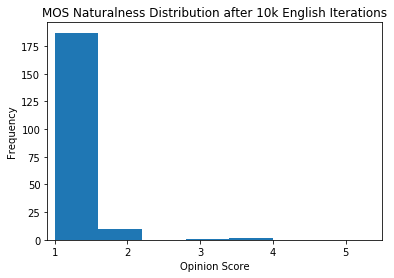

In [97]:
e_natdf = process(nat_df)
display(e_natdf)
print_stuff(e_natdf)
plt.hist(e_natdf.values.flatten(), 5)
plt.title('MOS Naturalness Distribution after 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosEnat.png')

## Trained English

Mean MOS:  3.615
STD MOS:  1.0520337447059387


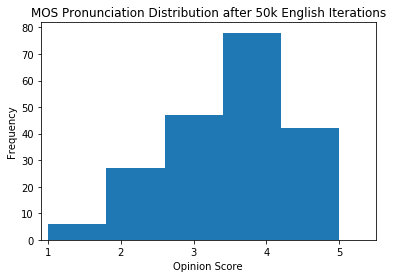

In [105]:
lj_prodf = process(pro_df, 'L')
print_stuff(lj_prodf)
plt.hist(lj_prodf.values.flatten(), 5)
plt.title('MOS Pronunciation Distribution after 50k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosLpro.png')

Mean MOS:  2.97
STD MOS:  0.9945350672550466


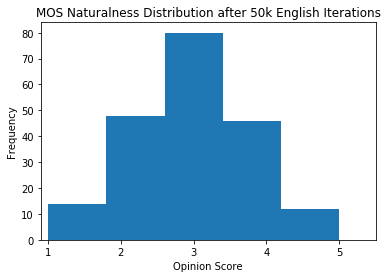

In [99]:
lj_natdf = process(nat_df, 'L')
print_stuff(lj_natdf)
plt.hist(lj_natdf.values.flatten(), 5)
plt.title('MOS Naturalness Distribution after 50k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosLnat.png')

## Midtune

Mean MOS:  3.77
STD MOS:  0.9365361712181757


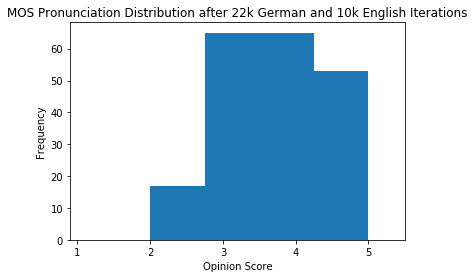

In [101]:
m_prodf = process(pro_df, 'M')
print_stuff(m_prodf)
plt.hist(m_prodf.values.flatten(), 4)
plt.title('MOS Pronunciation Distribution after 22k German and 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosMpro.png')

Mean MOS:  3.21
STD MOS:  1.0889903580840374


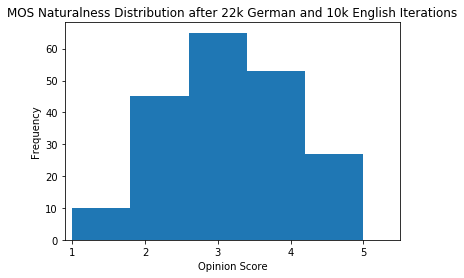

In [102]:
m_natdf = process(nat_df, 'M')
print_stuff(m_natdf)
plt.hist(m_natdf.values.flatten(), 5)
plt.title('MOS Naturalness Distribution after 22k German and 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosMnat.png')

## Finetune

Mean MOS:  3.59
STD MOS:  0.8898876333560322


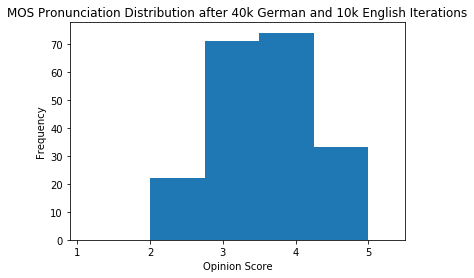

In [103]:
f_prodf = process(pro_df, 'F')
print_stuff(f_prodf)
plt.hist(f_prodf.values.flatten(), 4)
plt.title('MOS Pronunciation Distribution after 40k German and 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosFpro.png')

Mean MOS:  2.605
STD MOS:  0.9428547077890633


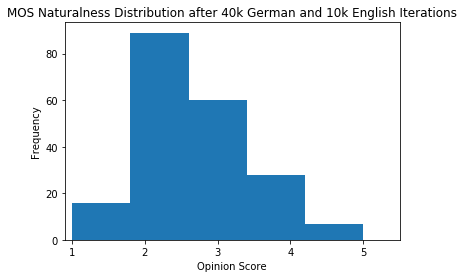

In [104]:
f_natdf = process(nat_df, 'F')
print_stuff(f_natdf)
plt.hist(f_natdf.values.flatten(), 5)
plt.title('MOS Naturalness Distribution after 40k German and 10k English Iterations')
plt.ylabel('Frequency')
plt.xlabel('Opinion Score')
plt.xticks(range(1, 6))
plt.xlim(xmin=0.9, xmax = 5.5)
plt.savefig(PATH + '/plots/mosFnat.png')

# Sentence Length Study

In [107]:
import numpy as np

In [166]:
quantiles = np.quantile(sentence_lengths, [0.33, 0.66, 1])
quantiles

array([ 9.  , 11.54, 16.  ])

In [138]:
q1 = ['(M|F)'+str(i) for i in range(len(sentence_lengths)) if sentence_lengths[i] <= quantiles[0]]
q2 = ['(M|F)'+str(i) for i in range(len(sentence_lengths)) if quantiles[0] < sentence_lengths[i] <= quantiles[1]]
q3 = ['(M|F)'+str(i) for i in range(len(sentence_lengths)) if quantiles[1] < sentence_lengths[i]]

In [139]:
print(q1, q2, q3)

['(M|F)4', '(M|F)10', '(M|F)12', '(M|F)14', '(M|F)16', '(M|F)17', '(M|F)18', '(M|F)19'] ['(M|F)5', '(M|F)6', '(M|F)9', '(M|F)13', '(M|F)15'] ['(M|F)0', '(M|F)1', '(M|F)2', '(M|F)3', '(M|F)7', '(M|F)8', '(M|F)11']


In [155]:
def process_sent(df, models = [], q=1):
    """
    Returns processesd
    """
    letters = '(' + '|'.join(models) + ')' if len(models) > 1 else models[0]
    
    if q==1:
        q= [letters+str(i) for i in range(len(sentence_lengths)) if sentence_lengths[i] <= quantiles[0]]
    elif q==2:
        q=[letters+str(i) for i in range(len(sentence_lengths)) if quantiles[0] < sentence_lengths[i] <= quantiles[1]]
    elif q==3:
        q = [letters+str(i) for i in range(len(sentence_lengths)) if quantiles[1] < sentence_lengths[i]]
    
    filtered = df.filter(regex='|'.join(q))
    fdict = filtered.to_dict('list')

    # strip nan
    for file in filtered:
        fdict[file] = [x for x in fdict[file] if not math.isnan(x)][:10]
    
    return pd.DataFrame(fdict)

In [160]:
mod = ['M']
small = process_sent(pro_df, mod, 1)
display(small)
print('small')
print_stuff(small)
print('\nmid')

mid = process_sent(pro_df, mod, 2)
print_stuff(mid)
print('\nlarge')

large = process_sent(pro_df, mod, 3)
print_stuff(large)

,M10 [Pronunciation],M12 [Pronunciation],M14 [Pronunciation],M16 [Pronunciation],M17 [Pronunciation],M18 [Pronunciation],M19 [Pronunciation],M4 [Pronunciation]
0,3.0,3.0,4.0,5.0,5.0,3.0,5.0,4.0
1,5.0,4.0,3.0,5.0,2.0,3.0,4.0,3.0
2,5.0,4.0,5.0,5.0,3.0,3.0,3.0,5.0
3,5.0,2.0,3.0,4.0,4.0,5.0,4.0,4.0
4,5.0,3.0,4.0,5.0,4.0,5.0,5.0,5.0
5,5.0,4.0,4.0,4.0,3.0,5.0,2.0,5.0
6,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
7,5.0,4.0,2.0,4.0,3.0,3.0,3.0,5.0
8,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0
9,5.0,2.0,3.0,3.0,3.0,4.0,4.0,5.0


small
Mean MOS:  3.9125
STD MOS:  0.9245776062613673

mid
Mean MOS:  3.66
STD MOS:  0.8151073548925932

large
Mean MOS:  3.81875
STD MOS:  0.9609362296739571


In [152]:
mid = process_sent(pro_df, ['L'], q2)
print_stuff(mid)

Mean MOS:  3.56
STD MOS:  0.8522910301065005


In [147]:
large = process_sent(pro_df, ['M'], q3)
print_stuff(large)

Mean MOS:  3.69375
STD MOS:  0.9420514516203453


# Notes
Robust across size for M. 